In [1]:
import pandas as pd
import datetime
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
textdf = pd.read_csv('abcnews-date-text.csv')
textdf

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


In [4]:
textdf.dtypes

publish_date      int64
headline_text    object
dtype: object

In [5]:
textdf.shape

(1244184, 2)

In [6]:
textdf.columns = ['date', 'headline']

In [7]:
textdf

,date,headline
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


In [8]:
textdf['date'] = pd.to_datetime(textdf['date'], format='%Y%m%d')

In [9]:
textdf.head()

,date,headline
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [10]:
vader = SentimentIntensityAnalyzer()
f = lambda headline: vader.polarity_scores(headline)['compound']

In [11]:
textdf['compound_score'] = textdf['headline'].apply(f)

In [12]:
textdf.head()

,date,headline,compound_score
0,2003-02-19,aba decides against community broadcasting lic...,0.0000
1,2003-02-19,act fire witnesses must be aware of defamation,-0.3400
2,2003-02-19,a g calls for infrastructure protection summit,0.0000
3,2003-02-19,air nz staff in aust strike for pay rise,-0.2263
4,2003-02-19,air nz strike to affect australian travellers,-0.1280


In [13]:
mean_score = textdf.groupby(['date']).mean()

In [14]:
mean_score.tail()

,compound_score
date,
2021-12-27,-0.114184
2021-12-28,-0.052474
2021-12-29,0.006050
2021-12-30,0.016529
2021-12-31,0.008130


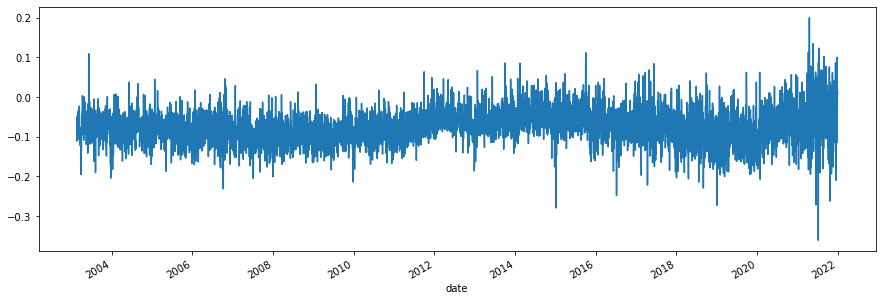

In [15]:
mean_score['compound_score'].plot(style='-', figsize=(15, 5))
plt.show()

In [17]:
cba = pd.read_excel('CBA.xls')
cba

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-02-19,24.527111,24.596733,24.009914,24.178999,8.582987,7242608.0
1,2003-02-20,24.119322,24.258568,23.880613,23.880613,8.477066,4411893.0
2,2003-02-21,23.840830,24.547005,23.691639,24.517164,8.703027,4636529.0
3,2003-02-24,24.815550,25.273069,24.716087,25.034363,8.886621,5694496.0
4,2003-02-25,24.865278,24.915010,24.566896,24.566896,8.720679,3886273.0
...,...,...,...,...,...,...,...
4783,2021-12-23,100.000000,100.589996,99.760002,100.110001,96.313484,992730.0
4784,2021-12-24,100.580002,101.139999,100.580002,100.629997,96.813759,888168.0
4785,2021-12-29,101.419998,102.370003,101.370003,101.900002,98.035606,1548336.0
4786,2021-12-30,102.000000,102.580002,101.709999,102.269997,98.391563,1015385.0


In [18]:
cba.columns = cba.columns.str.lower()

In [19]:
cba['date'] = pd.to_datetime(cba['date'])

In [20]:
cba.index = cba.pop('date')

In [21]:
cba

,open,high,low,close,adj close,volume
date,,,,,,
2003-02-19,24.527111,24.596733,24.009914,24.178999,8.582987,7242608.0
2003-02-20,24.119322,24.258568,23.880613,23.880613,8.477066,4411893.0
2003-02-21,23.840830,24.547005,23.691639,24.517164,8.703027,4636529.0
2003-02-24,24.815550,25.273069,24.716087,25.034363,8.886621,5694496.0
2003-02-25,24.865278,24.915010,24.566896,24.566896,8.720679,3886273.0
...,...,...,...,...,...,...
2021-12-23,100.000000,100.589996,99.760002,100.110001,96.313484,992730.0
2021-12-24,100.580002,101.139999,100.580002,100.629997,96.813759,888168.0
2021-12-29,101.419998,102.370003,101.370003,101.900002,98.035606,1548336.0


In [22]:
cba['movement'] = cba['close'] - cba['open']

In [23]:
cba

,open,high,low,close,adj close,volume,movement
date,,,,,,,
2003-02-19,24.527111,24.596733,24.009914,24.178999,8.582987,7242608.0,-0.348112
2003-02-20,24.119322,24.258568,23.880613,23.880613,8.477066,4411893.0,-0.238709
2003-02-21,23.840830,24.547005,23.691639,24.517164,8.703027,4636529.0,0.676334
2003-02-24,24.815550,25.273069,24.716087,25.034363,8.886621,5694496.0,0.218813
2003-02-25,24.865278,24.915010,24.566896,24.566896,8.720679,3886273.0,-0.298382
...,...,...,...,...,...,...,...
2021-12-23,100.000000,100.589996,99.760002,100.110001,96.313484,992730.0,0.110001
2021-12-24,100.580002,101.139999,100.580002,100.629997,96.813759,888168.0,0.049995
2021-12-29,101.419998,102.370003,101.370003,101.900002,98.035606,1548336.0,0.480004


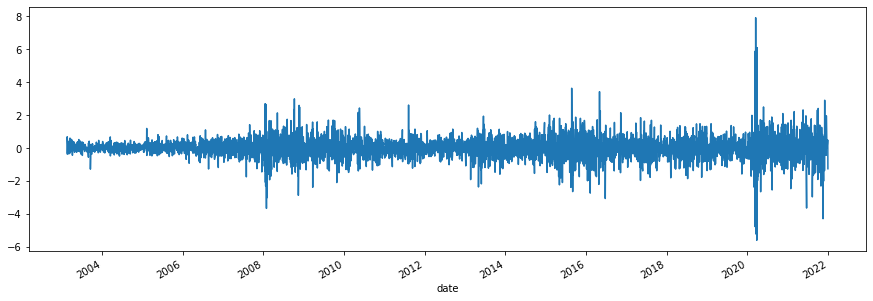

In [24]:
cba['movement'].plot(style='-', figsize=(15, 5))
plt.show()

In [25]:
merge = pd.merge_asof(mean_score, cba, on='date')

In [26]:
merge

,date,compound_score,open,high,low,close,adj close,volume,movement
0,2003-02-19,-0.107614,24.527111,24.596733,24.009914,24.178999,8.582987,7242608.0,-0.348112
1,2003-02-20,-0.110760,24.119322,24.258568,23.880613,23.880613,8.477066,4411893.0,-0.238709
2,2003-02-21,-0.104719,23.840830,24.547005,23.691639,24.517164,8.703027,4636529.0,0.676334
3,2003-02-22,-0.052789,23.840830,24.547005,23.691639,24.517164,8.703027,4636529.0,0.676334
4,2003-02-23,-0.099331,23.840830,24.547005,23.691639,24.517164,8.703027,4636529.0,0.676334
...,...,...,...,...,...,...,...,...,...
6877,2021-12-27,-0.114184,100.580002,101.139999,100.580002,100.629997,96.813759,888168.0,0.049995
6878,2021-12-28,-0.052474,100.580002,101.139999,100.580002,100.629997,96.813759,888168.0,0.049995
6879,2021-12-29,0.006050,101.419998,102.370003,101.370003,101.900002,98.035606,1548336.0,0.480004
6880,2021-12-30,0.016529,102.000000,102.580002,101.709999,102.269997,98.391563,1015385.0,0.269997


In [27]:
newdf = merge.copy()

In [28]:
newdf.index = newdf.pop('date')

In [29]:
newdf

,compound_score,open,high,low,close,adj close,volume,movement
date,,,,,,,,
2003-02-19,-0.107614,24.527111,24.596733,24.009914,24.178999,8.582987,7242608.0,-0.348112
2003-02-20,-0.110760,24.119322,24.258568,23.880613,23.880613,8.477066,4411893.0,-0.238709
2003-02-21,-0.104719,23.840830,24.547005,23.691639,24.517164,8.703027,4636529.0,0.676334
2003-02-22,-0.052789,23.840830,24.547005,23.691639,24.517164,8.703027,4636529.0,0.676334
2003-02-23,-0.099331,23.840830,24.547005,23.691639,24.517164,8.703027,4636529.0,0.676334
...,...,...,...,...,...,...,...,...
2021-12-27,-0.114184,100.580002,101.139999,100.580002,100.629997,96.813759,888168.0,0.049995
2021-12-28,-0.052474,100.580002,101.139999,100.580002,100.629997,96.813759,888168.0,0.049995
2021-12-29,0.006050,101.419998,102.370003,101.370003,101.900002,98.035606,1548336.0,0.480004


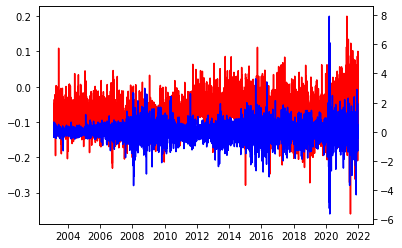

In [30]:
x = newdf.index
y1 = newdf['compound_score']
y2 = newdf['movement']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
curve1 = ax1.plot(x, y1, label = 'Compound score', color='r')
curve2 = ax2.plot(x, y2, label = 'Stock movement', color='b')

plt.plot()
plt.show()